In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from tkinter import *

# to print everything
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# read csv into memory, later just query sql table
dt = pd.read_csv('bet365_outcome_features.csv')


In [19]:
# Create drop down boxes
# options = np.unique(dt['league'])
# master = Tk()
# master.title('Pick the league')
# variable = StringVar(master)
# variable.set(options[0]) # default value
# w = OptionMenu(master, variable, *options)
# w.pack()
# mainloop()
# league = variable.get()
# df = dt[dt['league'] == league]

# options = np.unique(df['home_team'])
# master = Tk()
# master.title('Pick a team')
# variable = StringVar(master)
# variable.set(options[0]) # default value
# w = OptionMenu(master, variable, *options)
# w.pack()
# mainloop()
# team1 = variable.get()

''

''

In [2]:
# change this to SQL input
team1 = 'Everton'
df = pd.concat([dt[(dt.home_team == team1)], dt[(dt.away_team == team1)]])


In [19]:
# make plot with winnings over time
n_games = len(df['match_id'])
size_of_each_bet = 100
return_on_bet = (df['winning_team'] == team1)*df['closing_odds_outcome']*size_of_each_bet
winnings = np.zeros(n_games)
winnings[0] = -size_of_each_bet + return_on_bet.values[0]
i = 1
while i < n_games:
    winnings[i] = winnings[i-1] - size_of_each_bet + return_on_bet.values[i]
    i = i+1

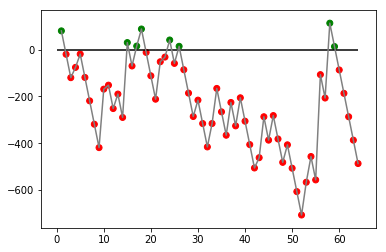

In [97]:
x = np.linspace(1, n_games, n_games)
plt.plot(x,winnings, c = 'grey')
plt.hlines(y=0, xmin=0, xmax = n_games)
green = winnings > 0
colors = ['']*len(green)
for i in range(len(green)):
    if green[i] == True:
        colors[i] = 'g'
    else:
        colors[i] = 'r'
plt.scatter(x, winnings, c = colors)

#plt.show()